In [1]:
!git clone https://github.com/qlaam/UrbanTrafficWeatherAnalysis.git
%cd UrbanTrafficWeatherAnalysis


Cloning into 'UrbanTrafficWeatherAnalysis'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 37 (delta 9), reused 13 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 661.89 KiB | 11.61 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/UrbanTrafficWeatherAnalysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## EDA

In [3]:
import pandas as pd
df_raw = pd.read_csv('/content/UrbanTrafficWeatherAnalysis/data/raw/synthetic_traffic_dataset.csv')


In [4]:
#Take a copy
df = df_raw.copy()
df.head()

,traffic_id,date_time,city,area,vehicle_count,avg_speed_kmh,accident_count,congestion_level,road_condition,visibility_m
0,10130.0,2024-08-30T06:11Z,London,Camden,211,46.9,0,High,Wet,583
1,11317.0,2024-08-22 01:20,London,Hammersmith,182,46.1,0,High,Snowy,6210
2,9722.0,2099-00-00 99:99,London,Southwark,196,38.1,0,Medium,Damaged,NaN
3,10210.0,2024-01-26T09:03Z,London,Camden,208,48.9,0,High,Wet,6436
4,9860.0,2024-08-24T21:05Z,London,Hackney,218,46.1,0,High,Damaged,NaN


In [5]:
# see data shape (rows, column)
df.shape

(5055, 10)

In [6]:
# see column name
df.columns

Index(['traffic_id', 'date_time', 'city', 'area', 'vehicle_count',
       'avg_speed_kmh', 'accident_count', 'congestion_level', 'road_condition',
       'visibility_m'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5055 entries, 0 to 5054
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   traffic_id        5005 non-null   float64
 1   date_time         5009 non-null   object 
 2   city              5005 non-null   object 
 3   area              4754 non-null   object 
 4   vehicle_count     4914 non-null   object 
 5   avg_speed_kmh     4983 non-null   object 
 6   accident_count    4974 non-null   object 
 7   congestion_level  4949 non-null   object 
 8   road_condition    4980 non-null   object 
 9   visibility_m      5027 non-null   object 
dtypes: float64(1), object(9)
memory usage: 395.1+ KB


In [8]:
# see each column data type
df.dtypes

,0
traffic_id,float64
date_time,object
city,object
area,object
vehicle_count,object
avg_speed_kmh,object
accident_count,object
congestion_level,object
road_condition,object
visibility_m,object


In [9]:
df.describe(include='all')

,traffic_id,date_time,city,area,vehicle_count,avg_speed_kmh,accident_count,congestion_level,road_condition,visibility_m
count,5005.000000,5009,5005,4754,4914,4983,4974,4949,4980,5027
unique,NaN,4732,1,8,96,611,7,4,4,3877
top,NaN,2024-02-31 12:00,London,Islington,198,50.2,0,High,Wet,50000
freq,NaN,19,5005,644,157,30,4052,1668,1267,10
mean,11497.948651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1442.253452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,9001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10248.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,11500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,12747.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **problems**

vehicle_count = object type (string)

visibility_m has extreme high values (6000+)

Some values missing → NaN

traffic_id has decimals like 10130.0 because it was saved as float  ➡ Must convert to int and validate ranges.

In [10]:
df.duplicated().sum()

np.int64(55)

In [11]:
df.loc[df.duplicated()]

,traffic_id,date_time,city,area,vehicle_count,avg_speed_kmh,accident_count,congestion_level,road_condition,visibility_m
1885,13385.0,2024-12-26 19:47,London,Hammersmith,186,26.2,1,High,Dry,1327
2396,13291.0,14/08/2024 06AM,London,Camden,222,42.0,NaN,Low,Dry,1146
2433,10081.0,2024-05-28T14:40Z,London,Chelsea,210,42.4,0,Low,Dry,2831
3017,11339.0,17/07/2024 05AM,London,Chelsea,NaN,36.4,0,Medium,Damaged,3351
3849,9939.0,2024-02-18 05:21,London,Southwark,204,47.9,0,Medium,Dry,2201
5005,9776.0,2024-07-01T18:30Z,London,Chelsea,195,47.7,0,Medium,Dry,259
5006,11557.0,28/08/2024 09PM,London,Camden,202,41.7,0,Medium,Snowy,4182
5007,10479.0,06/04/2024 05PM,London,Southwark,193,52.6,0,High,Damaged,7471
5008,10364.0,2024-12-01T07:52Z,London,Islington,175,56.4,1,High,Wet,6605
5009,11613.0,2024-02-02 22:11,London,Kensington,201,33.0,0,Low,Damaged,4711


In [12]:
df.isna().sum()

,0
traffic_id,50
date_time,46
city,50
area,301
vehicle_count,141
avg_speed_kmh,72
accident_count,81
congestion_level,106
road_condition,75
visibility_m,28


In [13]:
missing_pct = (df.isna().sum() / len(df)) * 100
missing_pct


,0
traffic_id,0.989120
date_time,0.909990
city,0.989120
area,5.954500
vehicle_count,2.789318
avg_speed_kmh,1.424332
accident_count,1.602374
congestion_level,2.096934
road_condition,1.483680
visibility_m,0.553907


<Axes: xlabel='None'>

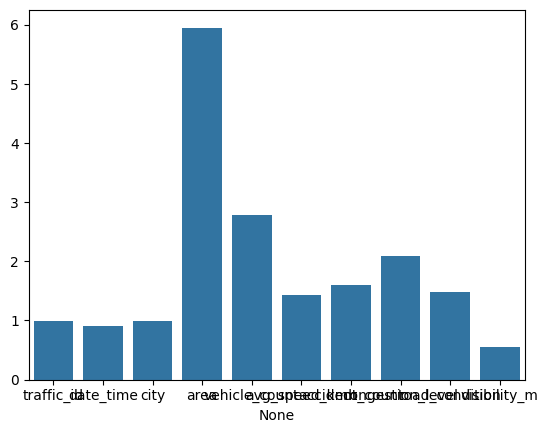

In [14]:
sns.barplot(x=missing_pct.index, y=missing_pct.values)

In [15]:
# UNIQUE VALUE COUNTS
for col in df.columns:
    print(f"\n---- {col} ----")
    print(df[col].value_counts().head(10))


---- traffic_id ----
traffic_id
10083.0    2
12557.0    2
9776.0     2
11392.0    2
11339.0    2
10268.0    2
12172.0    2
11048.0    2
9190.0     2
11825.0    2
Name: count, dtype: int64

---- date_time ----
date_time
2024-02-31 12:00    19
Unknown             16
TBD                 15
2099-13-40 25:61    12
??/??/????          12
2099-00-00 99:99    11
04/07/2024 08PM      4
05/02/2024 03PM      3
21/09/2024 05AM      3
17/07/2024 05AM      3
Name: count, dtype: int64

---- city ----
city
London    5005
Name: count, dtype: int64

---- area ----
area
Islington      644
Camden         620
Chelsea        613
Hackney        602
Southwark      598
Kensington     571
Greenwich      564
Hammersmith    542
Name: count, dtype: int64

---- vehicle_count ----
vehicle_count
198    157
200    145
202    143
197    141
203    136
201    136
207    135
192    135
193    135
196    131
Name: count, dtype: int64

---- avg_speed_kmh ----
avg_speed_kmh
50.2    30
43.9    25
46.8    25
46.5    25
47.6 

In [16]:
for col in ['congestion_level','road_condition','area','city']:
    print("\n", col, "unique:")
    print(df[col].unique())



 congestion_level unique:
['High' 'Medium' 'Low' nan ' ']

 road_condition unique:
['Wet' 'Snowy' 'Damaged' 'Dry' nan]

 area unique:
['Camden' 'Hammersmith' 'Southwark' 'Hackney' 'Kensington' 'Chelsea' nan
 'Greenwich' 'Islington']

 city unique:
['London' nan]


In [17]:
for col in ['vehicle_count','avg_speed_kmh','accident_count','visibility_m']:
    print(col, " | Non-numeric values:", df[col].astype(str).str.isnumeric().value_counts())

vehicle_count  | Non-numeric values: vehicle_count
True     4902
False     153
Name: count, dtype: int64
avg_speed_kmh  | Non-numeric values: avg_speed_kmh
False    5055
Name: count, dtype: int64
accident_count  | Non-numeric values: accident_count
True     4966
False      89
Name: count, dtype: int64
visibility_m  | Non-numeric values: visibility_m
True     5015
False      40
Name: count, dtype: int64


In [18]:
# Show how many and a sample
print(f"Found {len(invalid_dates)} rows with invalid dates ({len(invalid_dates)/len(df)*100:.2f}%)")
display(invalid_dates[['traffic_id', 'date_time']].head(10))

NameError: name 'invalid_dates' is not defined

In [ ]:
#Check extreme outliers
df[['vehicle_count','avg_speed_kmh','visibility_m']].describe()


## Cleaning

In [ ]:
df['city'] = "London"

In [ ]:
def parse_date_robust(date_str):
    if pd.isna(date_str):
        return np.nan

    s = str(date_str).strip()

    # Fix common corrupted patterns
    # Placeholder times like 99:99
    s = s.replace("99:99", "00:00")
    s = s.replace("99:61", "00:01")

    # Normalize separators
    s = s.replace("T", " ").replace("Z", "").strip()

    # Fix double spaces
    while "  " in s:
        s = s.replace("  ", " ")

    # --- handle zero month/day ---
    # e.g. 2099-00-00 → 2099-01-01
    try:
        date_part, time_part = (s.split(" ") + ["00:00"])[:2]
        y, m, d = date_part.split("-")

        # Replace invalid month/day with '01'
        m = "01" if m == "00" else m
        d = "01" if d == "00" else d

        s = f"{y}-{m}-{d} {time_part}".strip()
    except:
        pass  # skip if unusual format

    # Parse attempts
    # Try flexible parsing
    parsed = pd.to_datetime(s, errors='coerce', utc=True)
    if pd.notna(parsed):
        return parsed.tz_convert(None)

    # Try day-first as fallback
    parsed = pd.to_datetime(s, errors='coerce', dayfirst=True, utc=True)
    if pd.notna(parsed):
        return parsed.tz_convert(None)

    return np.nan


In [ ]:
# Apply to dataset
df['date_time'] = df['date_time'].apply(parse_date_robust)

# Smart imputation for unrecoverable dates
median_date = df['date_time'].median()
df['date_time'] = df['date_time'].fillna(median_date)

print("Remaining NaT:", df['date_time'].isna().sum())

In [ ]:
# Fix Numeric Columns Safely
numeric_cols = ["traffic_id", "vehicle_count", "avg_speed_kmh",
                "accident_count", "visibility_m"]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


In [ ]:
# Fix negative speeds
df.loc[df['avg_speed_kmh'] < 0, 'avg_speed_kmh'] = np.nan

In [ ]:
# Median imputation
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


In [ ]:
# Fix Categorical Columns
mapping = {
    "low": "Low", "Low": "Low", "LOW": "Low",
    "medium": "Medium", "med": "Medium", "MID": "Medium",
    "high": "High", "HIGH": "High", "hi": "High",
}

df['congestion_level'] = (
    df['congestion_level']
    .astype(str)
    .str.strip()
    .map(lambda x: mapping.get(x, "Unknown"))
)


In [ ]:
# Road condition normalization
df['road_condition'] = df['road_condition'].astype(str).str.title()


In [ ]:
# Area missing fix
mode_area = df['area'].mode()[0]
df['area'] = df['area'].fillna(mode_area)


In [ ]:
# Outlier Handling
def clip_iqr(series, k=3):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return series.clip(lower, upper)

df['vehicle_count'] = clip_iqr(df['vehicle_count'])
df['avg_speed_kmh'] = clip_iqr(df['avg_speed_kmh'])
df['visibility_m']  = clip_iqr(df['visibility_m'])


In [ ]:
# Remove Duplicates
df = df.drop_duplicates()


In [ ]:
# Save Final Cleaned File
df.to_parquet("traffic_cleaned_smart.parquet", index=False)


In [ ]:
# Save data as csv
df.to_csv('traffic_cleaned_smart.csv', index=False)